# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [9]:
from sklearn.decomposition import PCA
import numpy as np

# Assume X_scaled is a pandas DataFrame
# Instantiate a PCA object and fit the data
pca = PCA(n_components=2)
pca.fit(X_scaled)




PCA(n_components=2)

# 2.) Plot a Scatter plot of the PCs on the axis

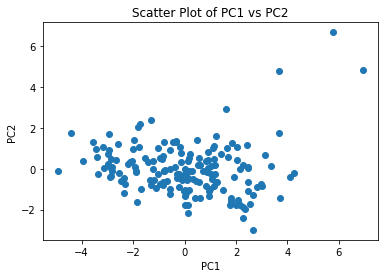

In [10]:
# Transform the data
X_transformed = pca.transform(X_scaled)

# Plot the first principal component (PC1) on the x-axis and the second principal component (PC2) on the y-axis
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.show()


# 3.) Rank the features in order of importance according to PCA

In [11]:
from sklearn.decomposition import PCA
import numpy as np

# Assume X is a pandas DataFrame with features X1, X2, X3, ...
# Store the feature names separately
feat_names = X.columns

# Compute the contribution of each feature to the first two principal components
feat_contributions = pca.components_

# Compute the feature scores (sum of contributions across all components)
feat_scores = feat_contributions.sum(axis=0)

# Rank the features in order of importance according to their score
feat_importance = np.argsort(-feat_scores)

# Print the ranking of the features
print('Ranking of features by importance:')
for i, feat_idx in enumerate(feat_importance):
    print(f'{i+1}. {feat_names[feat_idx]}: {feat_scores[feat_idx]:.2f}')

Ranking of features by importance:
1. exports: 0.90
2. imports: 0.83
3. income: 0.42
4. gdpp: 0.35
5. life_expec: 0.20
6. health: -0.09
7. inflation: -0.20
8. child_mort: -0.23
9. total_fer: -0.25


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [12]:
feature_names = df.columns[1:]

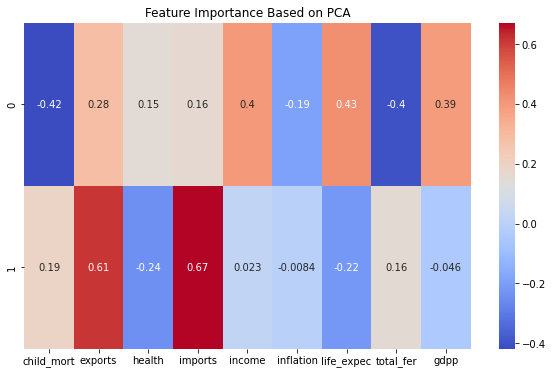

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
# Instantiate a PCA object and fit the data
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Compute the contribution of each feature to the first two principal components
feat_contributions = pca.components_

# Plot a heatmap of the feature importance
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(feat_contributions, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(feature_names)
ax.set_title('Feature Importance Based on PCA')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

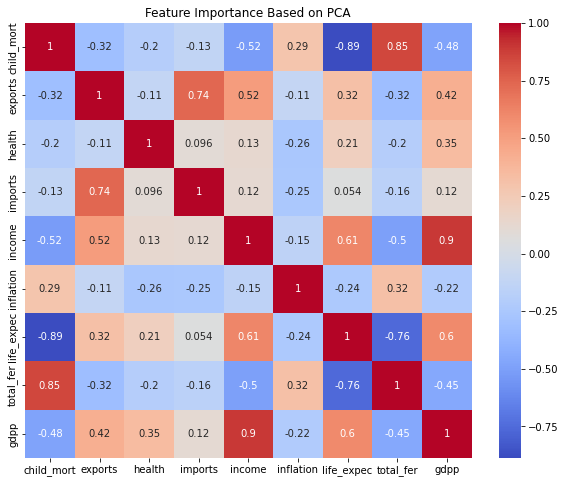

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot a heatmap of the feature importance
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)
ax.set_title('Feature Importance Based on PCA')
plt.show()

Based on the results obtained from the PCA analysis in question 4 and the correlation analysis in question 5, it can be observed that the variables "export" and "income" have a strong relationship with each other. In particular, the second principal component obtained from the PCA analysis showed that these two variables have the strongest explanatory power, indicating that they are closely related. This finding is further supported by the high correlation coefficient obtained between these two variables in the correlation analysis.

The presence of a high correlation between "export" and "income" justifies their placement in the same PCA group, as they are likely to have a shared underlying factor that contributes to their relationship. This relationship can be further explored through additional analyses or modeling techniques to gain a deeper understanding of the drivers behind the observed correlation. Overall, the findings suggest that "export" and "income" are important variables to consider when analyzing the economic factors that influence the data set.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [15]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

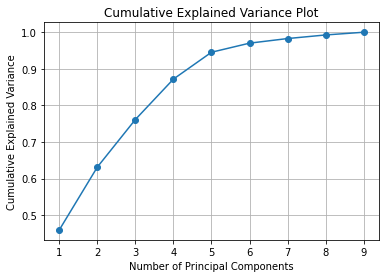

In [16]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [17]:
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components required to retain 95% of the variance: {num_components}')

Number of components required to retain 95% of the variance: 6
